In [ ]:
# Mounting Google Drive locally
from google.colab import drive
drive.mount('/content/drive/',force_remount=True)

Mounted at /content/drive/


In [ ]:
# Import data analysis libraries
import pandas as pd
import numpy as np

# Exploring the dataset


In [ ]:
# Load the datset
df = pd.read_csv('/content/fake_news (1).csv')
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
# Number of rows and columns
df.shape

(20800, 5)

In [ ]:
# Display all the columns of dataset
df.columns

Index(['id', 'title', 'author', 'text', 'label'], dtype='object')

In [ ]:
df["label"].value_counts()

1    10413
0    10387
Name: label, dtype: int64

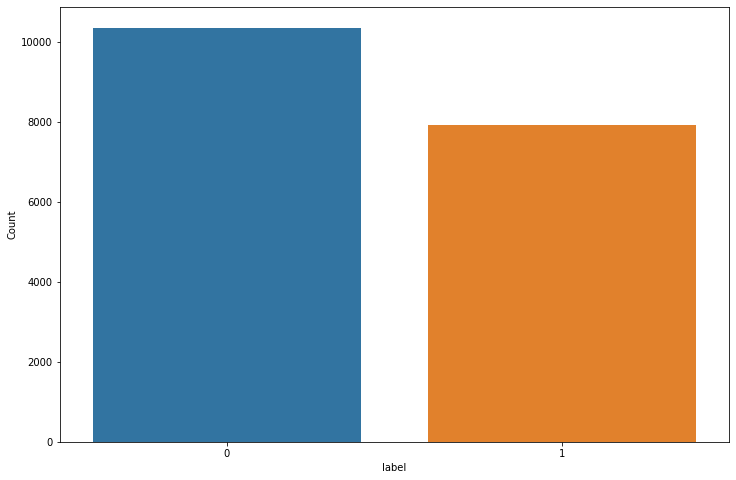

In [ ]:
# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
# Plotting the Outcome column
plt.figure(figsize=(12,8))
sns.countplot(x='label', data=df)
# Headings
plt.xlabel('label')
plt.ylabel('Count')
plt.show()

In [ ]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


# Data  Cleaning 

In [ ]:
# Looking for NaN values
df.isnull().any()

title      True
author     True
text       True
label     False
dtype: bool

In [ ]:
# Dropping NaN values
df = df.dropna()

In [ ]:
df.isnull().any()

title     False
author    False
text      False
label     False
dtype: bool

In [ ]:
df.head(10)

,title,author,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [ ]:
# Making a copy of df
df1 = df.copy()

In [ ]:
# Resetting index
df1.reset_index(inplace=True)


In [ ]:
# Display
df1.head(10)

,index,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
7,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
8,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
9,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [ ]:
df1["text"][5]

'In these trying times, Jackie Mason is the Voice of Reason. [In this week’s exclusive clip for Breitbart News, Jackie discusses the looming threat of North Korea, and explains how President Donald Trump could win the support of the Hollywood left if the U. S. needs to strike first.  “If he decides to bomb them, the whole country will be behind him, because everybody will realize he had no choice and that was the only thing to do,” Jackie says. “Except the Hollywood left. They’ll get nauseous. ” “[Trump] could win the left over, they’ll fall in love with him in a minute. If he bombed them for a better reason,” Jackie explains. “Like if they have no transgender toilets. ” Jackie also says it’s no surprise that Hollywood celebrities didn’t support Trump’s strike on a Syrian airfield this month. “They were infuriated,” he says. “Because it might only save lives. That doesn’t mean anything to them. If it only saved the environment, or climate change! They’d be the happiest people in the wo

In [ ]:
# Libraries for performing Natural Langauge Processing on taken dataset
# Import nltk and download the stopwords data
import nltk
nltk.download('stopwords')
# Removes stop words from a piece of text
from nltk.corpus import stopwords
# Stemming words from sentences
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
import re



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from nltk.corpus import stopwords
# Initialize the stopwords
stoplist = stopwords.words('english')

In [ ]:
# list of stopwords
print(stoplist)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
# cleaning and sorting  the 'text' Column
corpus = []
for i in range(0, len(df1)):
# Removing all special characters from the 'text' Column
    Final_words = re.sub(pattern='[^a-zA-Z]',repl= ' ',string= df1['text'][i])
# Coverting all letters into lower case   
    Final_words = Final_words.lower()
# Tokenizing sentences and words 
    Final_words = Final_words.split()
# Removing stopwords and Stemming words
    Final_words = [ps.stem(word) for word in Final_words if not word in stopwords.words('english')]
# Combining stemmed words     
    Final_words = ' '.join(Final_words)
# Created Corpus 
    corpus.append(Final_words)

In [ ]:
corpus[15]

'caddo nation tribal leader freed spend two day behind bar north dakota famili member say simpli innoc bystand clash polic protest guilti anyth polic claim via alternativenew jessi mitchel local news report famili member caddo nation chairwoman tamara franci fourkil said anonym donor paid million late saturday afternoon releas everyon arrest thursday dakota access pipelin site ad howev franci fourkil never suppos arrest first place expert sacr burial ground franci fourkil one tribal leader visit sioux stand rock advis negoti dakota access pipelin construct team mitchel continu remain desecr pipelin ask bunch peopl come big confer franci fourkil sister loretta franci explain visit franci said sister leader decid tour protest camp never thought would wind jail franci said sister access medic custodi cass counti north dakota face charg conspiraci riot part famili remov trail tear came oklahoma suffer said franci alway feel like gener parent grandpar tri make better next gener certainli wa

# Creating Bag of Words(BOW) model
#  TFidf Vectorizer

In [ ]:

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_v=TfidfVectorizer(max_features=5000,ngram_range=(1,4))
X=tfidf_v.fit_transform(corpus).toarray()

In [ ]:
X.shape

(18285, 5000)

In [ ]:
# Dependent variable from the dataset
y = df1['label']

In [ ]:
#Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [ ]:
# Top 50 words
tfidf_v.get_feature_names()[:100]

['aaron',
 'abandon',
 'abc',
 'abe',
 'abedin',
 'abil',
 'abl',
 'abort',
 'abroad',
 'absenc',
 'absolut',
 'absorb',
 'absurd',
 'abu',
 'abus',
 'academ',
 'academi',
 'acceler',
 'accept',
 'access',
 'access pipelin',
 'accid',
 'accommod',
 'accompani',
 'accomplish',
 'accord',
 'accord report',
 'account',
 'accumul',
 'accur',
 'accus',
 'achiev',
 'acid',
 'acknowledg',
 'acquir',
 'acr',
 'across',
 'across countri',
 'act',
 'action',
 'activ',
 'activist',
 'actor',
 'actress',
 'actual',
 'ad',
 'adam',
 'adapt',
 'add',
 'addict',
 'addit',
 'address',
 'adjust',
 'administr',
 'administr offici',
 'admir',
 'admiss',
 'admit',
 'adopt',
 'adult',
 'advanc',
 'advantag',
 'adventur',
 'adversari',
 'advertis',
 'advic',
 'advis',
 'advisor',
 'advisori',
 'advoc',
 'advocaci',
 'affair',
 'affect',
 'affili',
 'affirm',
 'afford',
 'afford care',
 'afford care act',
 'afghan',
 'afghanistan',
 'afraid',
 'africa',
 'african',
 'african american',
 'aftermath',
 'aftern

In [ ]:
# Display parameters
tfidf_v.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 4),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [ ]:
count_df = pd.DataFrame(X_train, columns=tfidf_v.get_feature_names())

In [ ]:
count_df.head(10)

,aaron,abandon,abc,abe,abedin,abil,abl,abort,abroad,absenc,absolut,absorb,absurd,abu,abus,academ,academi,acceler,accept,access,access pipelin,accid,accommod,accompani,accomplish,accord,accord report,account,accumul,accur,accus,achiev,acid,acknowledg,acquir,acr,across,across countri,act,action,...,written,wrong,wrongdo,wrote,wrote twitter,www,xi,yahoo,yard,ye,yeah,year,year ago,year later,year mr,year old,year said,year sinc,yell,yellow,yemen,yesterday,yet,yet anoth,yiannopoulo,yield,york,york citi,york time,yorker,young,young peopl,younger,youth,youtub,zero,zika,zionist,zone,zu
0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.054002,0.0,0.000000,0.0,0.200698,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0
1,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.053056,0.054919,0.055677,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.017844,0.036376,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.235377,0.028303,0.0,0.037869,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0
2,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.000000,0.014091,0.0,0.000000,0.009600,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.076524,0.008210,0.0,0.0,0.010308,0.0,0.0,0.0,0.0,0.000000,0.0,0.006609,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0
3,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.039287,0.0,0.054100,0.000000,0.0,0.055961,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0
4,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.215889,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.052745,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0
5,0.000000,0.057305,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.127861,0.0,0.0,0.0,0.0,0.05661,0.0,0.000000,0.019055,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.02868,0.0
6,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0
7,0.099154,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,

# Model Building
* ## Multinomial Naive Bayes

In [ ]:
# Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import itertools
classifier=MultinomialNB()

# Fitting model with trainig data
classifier.fit(X_train, y_train)

# Predicting the Test set results
pred = classifier.predict(X_test)


In [ ]:
# Accuracy Score on test set
from sklearn.metrics import accuracy_score
score = metrics.accuracy_score(y_test, pred)
print("Accuracy score is: {}%".format(round(score*100,2)))

Accuracy score is: 90.02%


In [ ]:
# Precision Score on test set
from sklearn.metrics import precision_score
score1 = metrics.precision_score(y_test, pred)
print("Precision score is: {}%".format(round(score1,2)))

Precision score is: 0.94%


In [ ]:
# Recall Score on test set
from sklearn.metrics import recall_score
score2 =  metrics.precision_score(y_test, pred)
print("Recall score is: {}%".format(round(score2,2)))

Recall score is: 0.94%


In [ ]:
# Confusion Matrix for testing set
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, pred)
conf_matrix
#plot_confusion_matrix(conf_matrix, classes=['FAKE Data', 'REAL Data'])


array([[3238,  151],
       [ 451, 2195]])

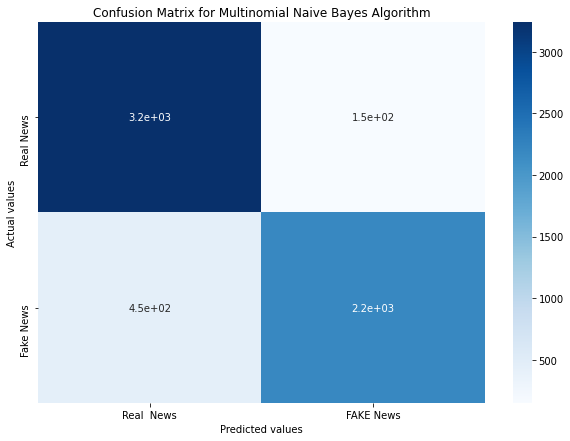

In [ ]:
# Plotting the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(data=conf_matrix, annot=True, cmap="Blues", xticklabels=['Real  News', 'FAKE News'], yticklabels=['Real News', 'Fake News'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Multinomial Naive Bayes Algorithm')
plt.show()


# Multinomial Classifier with Hyperparameter

In [ ]:
previous_score=0.0
alpha_val = 0.0
for i in np.arange(0.1,1.1,0.1):
  sub_classifier = MultinomialNB(alpha=i)
  sub_classifier.fit(X_train, y_train)
  sub_y_pred = sub_classifier.predict(X_test)
  score = accuracy_score(y_test, sub_y_pred)
  print("Accuracy score for alpha={} is: {}%".format(round(i,1), round(score*100,2)))
  if score>previous_score:
    previous_score = score
    alpha_val = i
print('Based on above results :')
print('With alpha value as {} , got the highest accuracy  {}% '.format(round(alpha_val,1),round(previous_score*100, 2) ))

Accuracy score for alpha=0.1 is: 90.09%
Accuracy score for alpha=0.2 is: 90.11%
Accuracy score for alpha=0.3 is: 90.09%
Accuracy score for alpha=0.4 is: 90.11%
Accuracy score for alpha=0.5 is: 90.06%
Accuracy score for alpha=0.6 is: 90.06%
Accuracy score for alpha=0.7 is: 90.09%
Accuracy score for alpha=0.8 is: 90.07%
Accuracy score for alpha=0.9 is: 90.06%
Accuracy score for alpha=1.0 is: 90.02%
Based on above results :
With alpha value as 0.2 , got the highest accuracy  90.11% 


# Got the highest accuracy as 90.11% 